In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load the Heart Disease UCI dataset into a Pandas DataFrame.

In [20]:
# Load the Heart Disease UCI dataset into a Pandas DataFrame
'''
he "goal" field refers to the presence of heart disease in the patient.  
It is integer valued from 0 (no presence) to 4. 
Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).  
'''
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "goal"]

df_cleveland = pd.read_csv('../data/raw_dataset/processed.cleveland.data', names=columns, na_values='?')

## Handle missing values

In [21]:
# Check null values in the DataFrame
print("Null values in the DataFrame:")
print(df_cleveland.isnull().sum())

print(f"Shape of the dataset before removing null values: {df_cleveland.shape}")

# remove rows with null values
df_cleveland = df_cleveland.dropna()

print(f"Shape of the dataset after removing null values: {df_cleveland.shape}")

Null values in the DataFrame:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
goal        0
dtype: int64
Shape of the dataset before removing null values: (303, 14)
Shape of the dataset after removing null values: (297, 14)


In [22]:
print("First 5 rows of the DataFrame:")
print(df_cleveland.head())

First 5 rows of the DataFrame:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  goal  
0    3.0  0.0   6.0     0  
1    2.0  3.0   3.0     2  
2    2.0  2.0   7.0     1  
3    3.0  0.0   3.0     0  
4    1.0  0.0   3.0     0  


## Perform data encoding (one-hot encoding for categorical variables).

In [23]:
# Separate features and target variable
data = df_cleveland[df_cleveland.columns[:-1]]  # Exclude the 'goal' column

# Binarize the goal column
'''
0 -> No absence of heart disease
1, 2, 3, 4 -> Presence of heart disease
'''
target = df_cleveland['goal'].apply(lambda x: 1 if x > 0 else 0)  # 0 -> 0,  and 1, 2, 3, 4 -> 1

In [24]:
# Get columns to hot-encode
columns_to_encode = [] # Columns that has more than three or more category
print("\nUnique values in each column:")
for column in data.columns:
    unique_values = data[column].unique()
    if len(unique_values) > 2 and len(unique_values) < 8:
        columns_to_encode.append(column)
        print(f"{column}: {unique_values}")
        
print(f"\nColumns to hot-encode: {columns_to_encode}")
# Hot-encode categorical variables
for column in columns_to_encode:
    data = pd.get_dummies(data, columns=[column])


Unique values in each column:
cp: [1. 4. 3. 2.]
restecg: [2. 0. 1.]
slope: [3. 2. 1.]
ca: [0. 3. 2. 1.]
thal: [6. 3. 7.]

Columns to hot-encode: ['cp', 'restecg', 'slope', 'ca', 'thal']


In [25]:
data.shape

(297, 25)

In [26]:
data.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,...,1,0,0,1,0,0,0,1,0,0


In [27]:
target.head()

0    0
1    1
2    1
3    0
4    0
Name: goal, dtype: int64

## Standardize numerical features using StandardScaler.

In [28]:
continuous_variables = []
for column in df_cleveland.columns:
    if len(df_cleveland[column].unique()) > 6:
        continuous_variables.append(column) 

In [29]:
# Split the data into training and testing sets
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Standardize the data
scaler = MinMaxScaler()
data_train_scaled = scaler.fit_transform(data_train[continuous_variables])
data_test_scaled = scaler.transform(data_test[continuous_variables])

In [30]:
data_train_scaled_df = pd.DataFrame(data_train_scaled, columns=continuous_variables, index=data_train.index)
data_test_scaled_df = pd.DataFrame(data_test_scaled, columns=continuous_variables, index=data_test.index)

In [31]:
# Update the data in train and test standardizing the numerical data
for column in continuous_variables:
    data_train[column] = data_train_scaled_df[column]
    data_test[column] = data_test_scaled_df[column]

In [32]:
# Concat the data 
train_data_standardized = pd.concat([data_train, target_train], axis=1)
test_data_standardized = pd.concat([data_test, target_test], axis=1)

# Save the data as csv
train_data_standardized.to_csv('../data/cleaned_dataset/cleaned_standardized_train_data.csv', index=False)
test_data_standardized.to_csv('../data/cleaned_dataset/cleaned_standardized_test_data.csv', index=False)

## Conduct Exploratory Data Analysis (EDA) with histograms, correlation heatmaps, and boxplots.

### Histogram

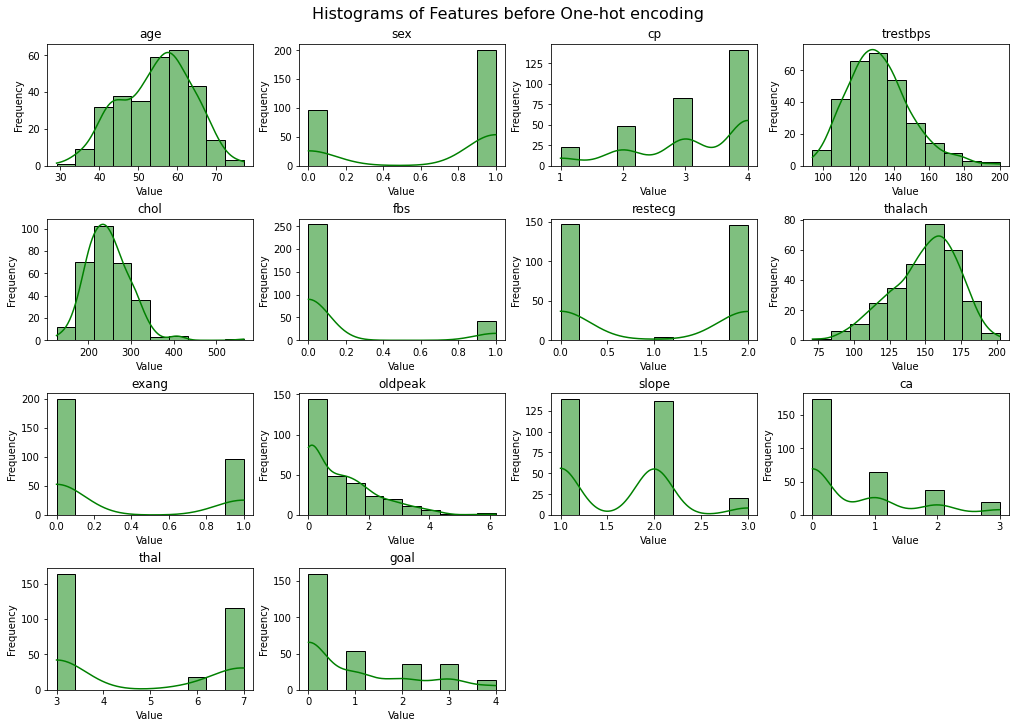

In [33]:
# Histogram of each feature(
fig = plt.figure(constrained_layout=True, figsize=(14, 10))
gs = fig.add_gridspec(4, 4) # 4 rows and 4 columns

for i, column in enumerate(df_cleveland.columns):
    ax = fig.add_subplot(gs[i // 4, i % 4])  # Create a subplot in the grid
    sns.histplot(df_cleveland[column], kde=True, color='g', bins=10, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
plt.suptitle('Histograms of Features before One-hot encoding', fontsize=16)
plt.show()

### Correlation heatmap

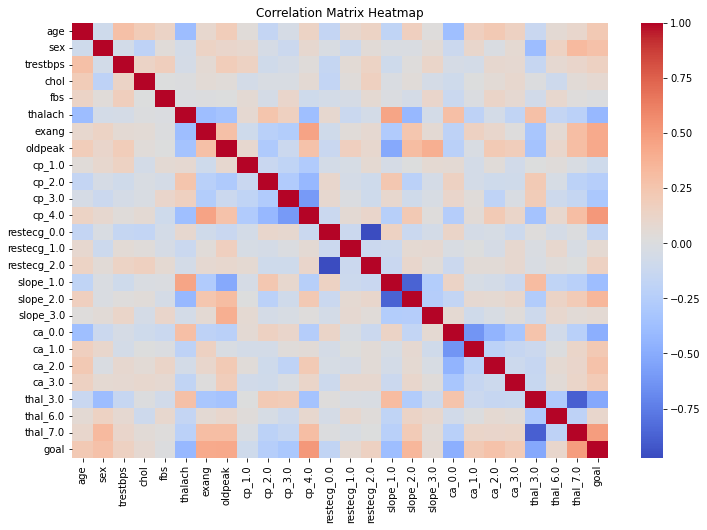

goal           1.000000
cp_4.0         0.507035
thal_7.0       0.484657
oldpeak        0.424052
exang          0.421355
slope_2.0      0.349635
sex            0.278467
ca_2.0         0.272400
ca_1.0         0.228974
age            0.227075
ca_3.0         0.209531
restecg_2.0    0.157440
trestbps       0.153490
thal_6.0       0.104651
chol           0.080285
restecg_1.0    0.067672
slope_3.0      0.060950
fbs            0.003167
cp_1.0        -0.091208
restecg_0.0   -0.173028
cp_2.0        -0.247535
cp_3.0        -0.305345
slope_1.0     -0.380612
thalach       -0.423817
ca_0.0        -0.483530
thal_3.0      -0.524972
Name: goal, dtype: float64

In [34]:
# Heatmap of the correlation matrix
corr_matrix = pd.concat([data, target], axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap') 
plt.show()
corr_matrix['goal'].sort_values(ascending=False)

### Boxplots


Categorical variables: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


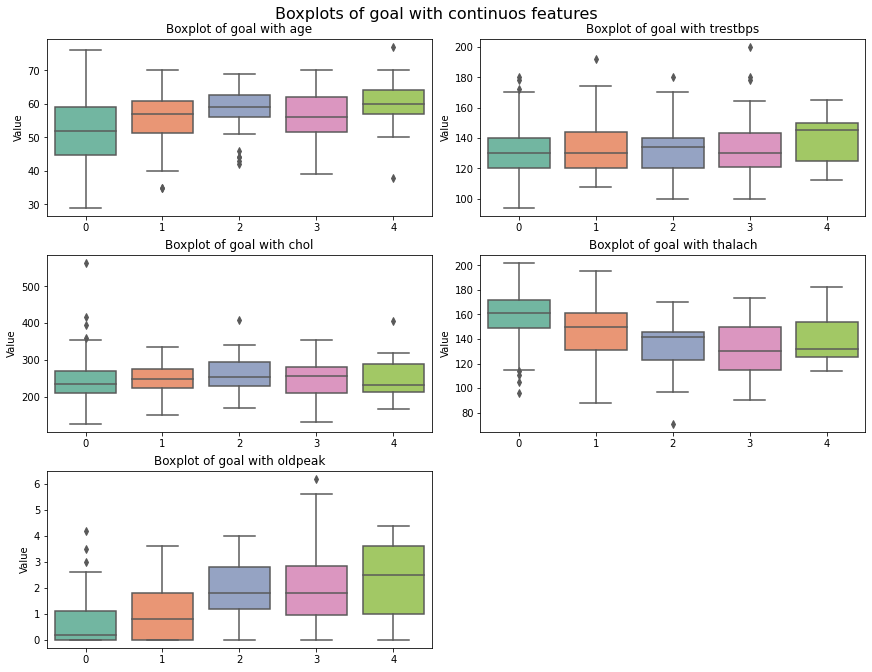

In [35]:
# Bar plot of the categorical variables
print(f"\nCategorical variables: {continuous_variables}")
# Create subplot grid: 3 rows x 2 cols
fig = plt.figure(constrained_layout=True, figsize=(12, 9))
gs = fig.add_gridspec(3, 2)  # 3 rows, 2 columns = 6 slots (1 unused)

for i, column in enumerate(continuous_variables):
    ax = fig.add_subplot(gs[i // 2, i % 2])  # 2 plots per row
    sns.boxplot(x='goal', y=column, data=df_cleveland, palette='Set2', ax=ax)
    ax.set_title(f'Boxplot of goal with {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Value')

plt.suptitle("Boxplots of goal with continuos features", fontsize=16, y=1.02)
plt.show()
